<a href="https://colab.research.google.com/github/tutalae/COVID_MAP/blob/main/DSE4_covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python Basic Playlist

https://www.youtube.com/playlist?list=PLAgCqpRa2bgv108WwTPAWh6fDwRyS49Vm

Coding online

https://edabit.com/challenge/KjCS7occ9hfu5snpb

- Data type
  - String
  - Number
  - List
- Variable
- Expression
  - compare numbers
  - compare strings
- Condition
  - if, elif, else
- Loop
  - for
- Function
- Library


# **Covid Data Analytics**

# 1. ติดตั้ง ตั้งค่า โหลดข้อมูลดิบ

In [ ]:
%%capture
!pip install pygsheets

In [ ]:
# โค้ดในส่วนของการ setup เรียกใช้ library (โค้ดที่คนอื่นเขียนให้เราใช้)
import pygsheets #read googlesheet
import google.auth
from google.colab import auth
import warnings
import pandas as pd
from datetime import datetime
import plotly.express as px 
# set maximum row to unlimit
pd.options.display.max_rows = 50
warnings.filterwarnings('ignore')

In [ ]:
# โค้ดในส่วนของการเชื่อมต่อกับ google sheet
auth.authenticate_user() #access google
credentials, _ = google.auth.default()
gc = pygsheets.client.Client(credentials)

In [ ]:
# โต้ดส่วนนี้เพื่อ download font ที่แสดงภาษาไทยได้
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [ ]:
# Get data from google sheet
url = 'https://docs.google.com/spreadsheets/d/1JbQje4qTUWbDAuwsSOz89JtFLd-EGzwLJjwcj4X6Tn0/edit?usp=sharing'
sheet = gc.open_by_url(url)
dat = sheet.sheet1.get_as_df()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,12/1/2020,,หญิง,61,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,
1,2,17/1/2020,,หญิง,74,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,
2,3,22/1/2020,,หญิง,73,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,22/1/2020,,ชาย,68,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,
4,5,24/1/2020,,หญิง,66,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,


In [ ]:
#.head() เป็นฟังก์ชั่นที่ใช้แสดงข้อมูล 5 บันทัดแรก
dat.head()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,date
0,1,12/1/2020,,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,,2020-01-12
1,2,17/1/2020,,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,,2020-01-17
2,3,22/1/2020,,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,2020-01-22
3,4,22/1/2020,,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,,2020-01-22
4,5,24/1/2020,,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,,2020-01-24


# 2. ดูสถิติเบื้องต้น

In [ ]:
#.describe() ใช้แสดงสถิติของข้อมูล
dat.describe()

,No.,age
count,439180.000000,396510.000000
mean,219590.500000,35.499638
std,126780.489948,16.026390
min,1.000000,1.000000
25%,109795.750000,25.000000
50%,219590.500000,34.000000
75%,329385.250000,46.000000
max,439180.000000,108.000000


In [ ]:
#.astype('int') เป็นฟังก์ชั่นที่ใช้แปลงค่าเป็นตัวเลข แต่เกิดปัญหาเพราะมีข้อมูลบางตัวแปลงไม่ได้
dat['age'].astype('int')

ValueError: ignored

In [ ]:
# จะต้องเรียกใช้ฟังก์ชั่น .to_numeric แทน
dat['age'] = pd.to_numeric(dat['age'], errors='coerce')

In [ ]:
dat.describe()

,No.,age
count,439180.000000,396510.000000
mean,219590.500000,35.499638
std,126780.489948,16.026390
min,1.000000,1.000000
25%,109795.750000,25.000000
50%,219590.500000,34.000000
75%,329385.250000,46.000000
max,439180.000000,108.000000


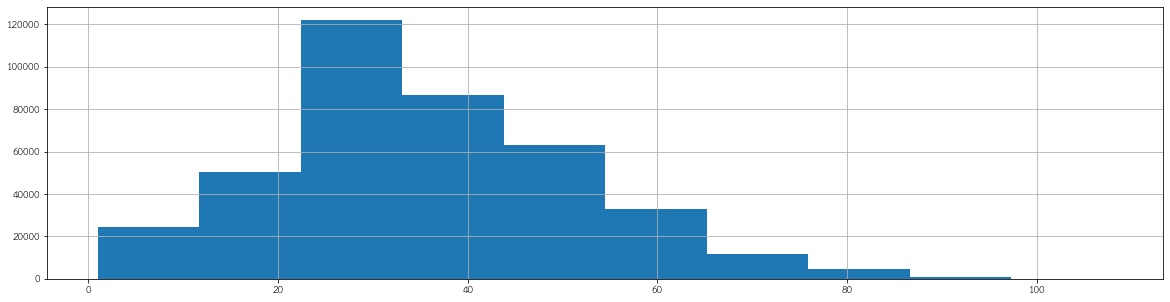

In [ ]:
#histogram
dat['age'].hist(figsize=(20,5))

In [ ]:
dat['sex'].value_counts()

ชาย     207149
หญิง    204600
         27430
นาย          1
Name: sex, dtype: int64

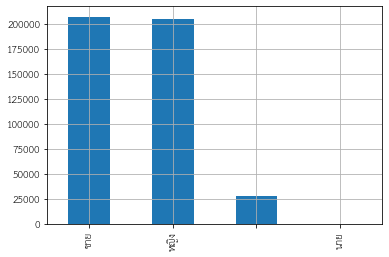

In [ ]:
dat['sex'].value_counts().plot.bar().grid()

In [ ]:
import numpy as np
fdat = dat[dat['sex']=='หญิง']['age']
mdat = dat[dat['sex']=='ชาย']['age']
fcount, division = np.histogram(fdat,range=(0,100),bins=20)
mcount, division = np.histogram(mdat,range=(0,100),bins=20)

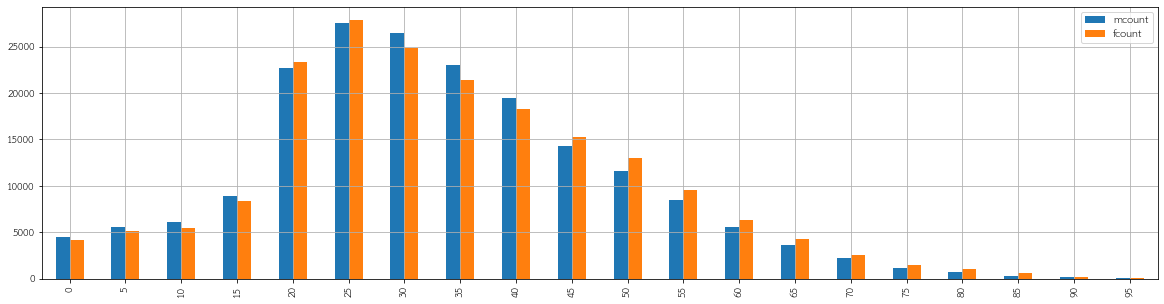

In [ ]:
fmdat = pd.DataFrame()
fmdat['mcount'] = mcount
fmdat['fcount'] = fcount
fmdat.index = range(0,100,5)
fmdat.plot.bar(figsize=(20,5)).grid()

In [ ]:
clusdat = dat[['risk','date','province_of_onset']]

In [ ]:
clusres = clusdat['risk'].value_counts()
clusres = pd.DataFrame(clusres)
clusres['cluster'] = clusres.index
clusres.columns = ['count','cluster']

In [ ]:
px.bar(clusres, x='cluster', y='count')

In [ ]:
px.bar(clusres, x='cluster', y='count',log_y=True)

# 3. พลอต trend ของการติดเชื้อ

In [ ]:
dat['date'] = dat['announce_date'].apply(lambda x:datetime.strptime(x,'%d/%m/%Y'))

In [ ]:
plottrend = dat[['date','No.']].groupby(by='date').count()

In [ ]:
plottrend.columns = ['daily infected']

In [ ]:
plottrend['date'] = plottrend.index

In [ ]:
px.line(plottrend,x='date',y='daily infected', title='covid')

In [ ]:
px.line(plottrend,x='date',y='daily infected',log_y=True, title='covid')

# 4. Cluster Analysis

In [ ]:
#select only clusters
clusdat = dat[dat['risk'].str.find('Cluster')!=-1][['risk','date','province_of_onset']]

In [ ]:
cset = list(set(clusdat['risk']))

In [ ]:
clusdat.head()

,risk,date,province_of_onset
124,Cluster ตลาดพรพัฒน์,2021-03-06,ปทุมธานี
4297,Cluster สมุทรสาคร,2020-12-18,สมุทรสาคร
4320,Cluster สมุทรสาคร,2020-12-19,สมุทรสาคร
4321,Cluster สมุทรสาคร,2020-12-19,สมุทรสาคร
4322,Cluster สมุทรสาคร,2020-12-19,สมุทรสาคร


In [ ]:
#find period of spread
clusdate = pd.crosstab(clusdat['date'],clusdat['risk'])

In [ ]:
clusdate.head()

risk,Cluster Icon siam,Cluster Memory 90's กรุงเทพมหานคร,Cluster New Jazz กรุงเทพมหานคร,Cluster The Lounge Salaya,Cluster กรุงเทพมหานคร. คลองเตย,Cluster คลองเตย,Cluster งานมอเตอร์ โชว์,Cluster จนท. สนามบินสุวรรณภูมิ,Cluster จันทบุรี,Cluster จันทบุรี (ชาวกินี ),Cluster จันทบุรี (ชาวกินี),Cluster ชลบุรี,Cluster ชลบุรี บริษัทไดกิ้น,Cluster ชลบุรี โรงเบียร์ 90,Cluster ตราด,Cluster ตราด,Cluster ตลาดนนทบุรี,Cluster ตลาดบางพลี,Cluster ตลาดบางแค,Cluster ตลาดบางแค/คลองขวาง,Cluster ตลาดพรพัฒน์,Cluster ตลาดสี่มุมเมือง,Cluster ทัณฑสถานหญิงกลาง,Cluster ทัณฑสถานโรงพยาบาลราชทัณฑ์,Cluster ทันฑสถานบำบัดพิเศษกลาง,Cluster บริษัทศรีสวัสดิ์,Cluster บางแค,Cluster บ่อนพัทยา/ชลบุรี,Cluster บ่อนเทพารักษ์,Cluster บ่อนไก่อ่างทอง,Cluster ปากช่อง,Cluster ผับ Thonglor,Cluster มหาสารคาม,Cluster ระยอง,Cluster ระยอง วิริยะประกันภัย,Cluster สถานบันเทิงย่านทองหล่อ,Cluster สมุทรปราการ (โรงงาน บริษัทเมทัล โปรดักส์),Cluster สมุทรปราการ GRP Hightech,Cluster สมุทรปราการ ตลาดเคหะบางพลี,Cluster สมุทรสาคร,Cluster ห้างแสงทอง (สายล่าง),"Cluster เครือคัสเซ่อร์พีคโฮลดิ้ง (CPG,CPH)",Cluster เรือนจำกลางคลองเปรม,Cluster เรือนจำพิเศษกรุงเทพ,Cluster เรือนจำพิเศษธนบุรี,Cluster เรือนจำพิเศษมีนบุรี,Cluster โรงงาน Big Star,Cluster โรงงาน Big Star,Cluster โรงงาน QPP ประจวบฯ,Cluster โรงงาน standard can,Cluster โรงงานทำขนม บางขุนเทียน
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2020-12-19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0
2020-12-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,535,0,0,0,0,0,0,0,0,0,0,0
2020-12-21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,372,0,0,0,0,0,0,0,0,0,0,0
2020-12-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,413,0,0,0,0,0,0,0,0,0,0,0


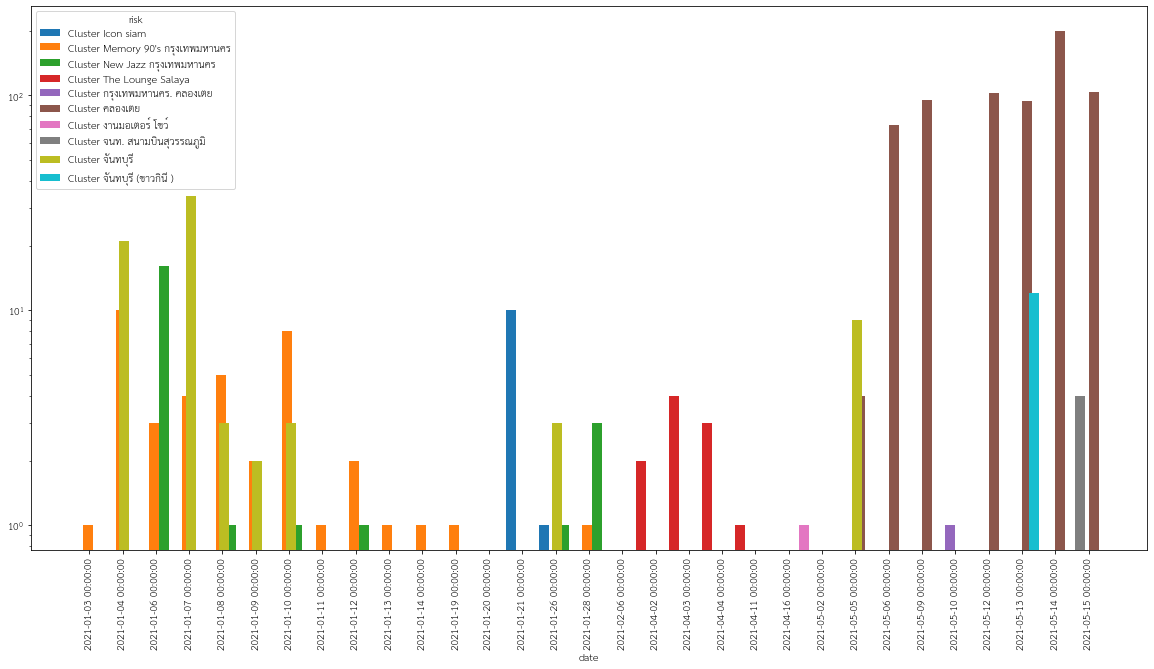

In [ ]:
fclusdate = clusdate.iloc[:,0:10]
fclusdate = fclusdate[fclusdate.sum(1)>0]
fclusdate.plot.bar(figsize=(20,10),width=3,logy=True)

In [ ]:
def getperiod(cname):
  fo = (clusdate[cname]>0).argmax()
  lo = len(clusdate)-(clusdate[cname].sort_index(ascending=False)>0).argmax()
  pr = lo-fo
  return pr

In [ ]:
cper = [[c,getperiod(c)] for c in cset]

In [ ]:
cper = pd.DataFrame(data=cper,columns=['custname','period']).sort_values(by='period',ascending=False)
cper.index = cper['custname']

In [ ]:
cper = cper[['period']]

In [ ]:
cper

,period
custname,
Cluster สมุทรสาคร,144
Cluster ระยอง,133
Cluster บ่อนไก่อ่างทอง,118
Cluster จันทบุรี,117
Cluster โรงงาน Big Star,67
...,...
Cluster ระยอง วิริยะประกันภัย,1
Cluster ทัณฑสถานโรงพยาบาลราชทัณฑ์,1
Cluster ห้างแสงทอง (สายล่าง),1


In [ ]:
#get cluster size
csize = clusdat.groupby('risk').count()[['date']]
csize.columns = ['count']
csize.head()

,count
risk,
Cluster Icon siam,11
Cluster Memory 90's กรุงเทพมหานคร,40
Cluster New Jazz กรุงเทพมหานคร,23
Cluster The Lounge Salaya,10
Cluster กรุงเทพมหานคร. คลองเตย,1


In [ ]:
clusdat.head()

,risk,date,province_of_onset
124,Cluster ตลาดพรพัฒน์,2021-03-06,ปทุมธานี
4297,Cluster สมุทรสาคร,2020-12-18,สมุทรสาคร
4320,Cluster สมุทรสาคร,2020-12-19,สมุทรสาคร
4321,Cluster สมุทรสาคร,2020-12-19,สมุทรสาคร
4322,Cluster สมุทรสาคร,2020-12-19,สมุทรสาคร


In [ ]:
#get cluster size
cspread = clusdat.groupby('risk').province_of_onset.nunique()
cspread = pd.DataFrame(cspread)
cspread.columns = ['province_spread']
cspread.head()

,province_spread
risk,
Cluster Icon siam,2
Cluster Memory 90's กรุงเทพมหานคร,3
Cluster New Jazz กรุงเทพมหานคร,2
Cluster The Lounge Salaya,2
Cluster กรุงเทพมหานคร. คลองเตย,1


In [ ]:
jdat = cper.join(csize).join(cspread)

In [ ]:
jdat.head()

,period,count,pspread
custname,,,
Cluster สมุทรสาคร,144,17900,49
Cluster ระยอง,133,482,18
Cluster บ่อนไก่อ่างทอง,118,69,8
Cluster จันทบุรี,117,75,2
Cluster โรงงาน Big Star,67,64,2


In [ ]:
import plotly.express as px
fig = px.scatter(y=jdat['count'], x=jdat['province_spread'],color=list(jdat.index),size=jdat['period'],labels={
                     "x": "#province spreaded",
                     "y": "count",
                     "color": "cluster",
                     "size":"spread days"})
fig.show()

# 5. Segmentation (to be continued)

In [ ]:
list(njdat.index)

['Cluster สมุทรสาคร',
 'Cluster ระยอง',
 'Cluster บ่อนไก่อ่างทอง',
 'Cluster จันทบุรี',
 'Cluster โรงงาน Big Star',
 'Cluster บางแค',
 'Cluster ตลาดพรพัฒน์',
 'Cluster เครือคัสเซ่อร์พีคโฮลดิ้ง (CPG,CPH)',
 "Cluster Memory 90's กรุงเทพมหานคร",
 'Cluster ผับ Thonglor',
 'Cluster New Jazz กรุงเทพมหานคร',
 'Cluster ตลาดบางพลี',
 'Cluster มหาสารคาม',
 'Cluster ชลบุรี โรงเบียร์ 90',
 'Cluster บ่อนพัทยา/ชลบุรี',
 'Cluster คลองเตย',
 'Cluster The Lounge Salaya',
 'Cluster สมุทรปราการ (โรงงาน บริษัทเมทัล โปรดักส์)',
 'Cluster จันทบุรี (ชาวกินี)',
 'Cluster ตลาดนนทบุรี',
 'Cluster โรงงาน QPP ประจวบฯ',
 'Cluster ตลาดสี่มุมเมือง',
 'Cluster Icon siam',
 'Cluster เรือนจำกลางคลองเปรม',
 'Cluster เรือนจำพิเศษกรุงเทพ',
 'Cluster สมุทรปราการ GRP Hightech',
 'Cluster ตลาดบางแค/คลองขวาง',
 'Cluster จนท. สนามบินสุวรรณภูมิ',
 'Cluster ตลาดบางแค',
 'Cluster สมุทรปราการ ตลาดเคหะบางพลี',
 'Cluster ตราด ',
 'Cluster บริษัทศรีสวัสดิ์',
 'Cluster เรือนจำพิเศษมีนบุรี',
 'Cluster ห้างแสงทอง (สายล่าง)',
 'Cluster ต

In [ ]:
from sklearn.cluster import KMeans
mod = KMeans(n_clusters=5, random_state=0)
cpr = mod.fit_predict(jdat)

In [ ]:
njdat = jdat/jdat.sum(0)[['period','count']]

In [ ]:
jdat['type'] = cpr

In [ ]:
jdat.groupby(by='type').mean()

,period,count
type,,
0,72.137097,239.548387
1,495.000000,154482.000000
2,334.333333,42671.000000
3,234.333333,19408.000000
4,448.000000,68757.000000


In [ ]:
jdat.groupby(by='type').count()

,period,count
type,,
0,124,124
1,1,1
2,3,3
3,3,3
4,1,1


In [ ]:
jdat[jdat['type']==4]

,period,count,type
custname,,,
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,448,68757,4


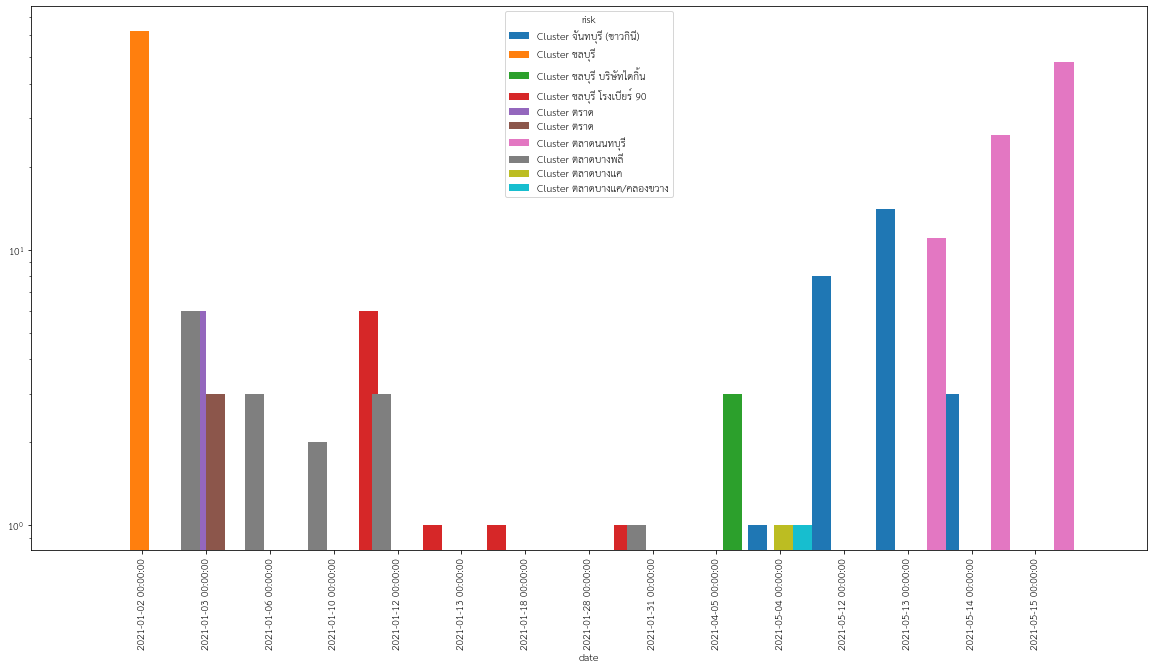

In [ ]:
fclusdate = clusdate.iloc[:,10:20]
fclusdate = fclusdate[fclusdate.sum(1)>0]
fclusdate.plot.bar(figsize=(20,10),width=3,logy=True)

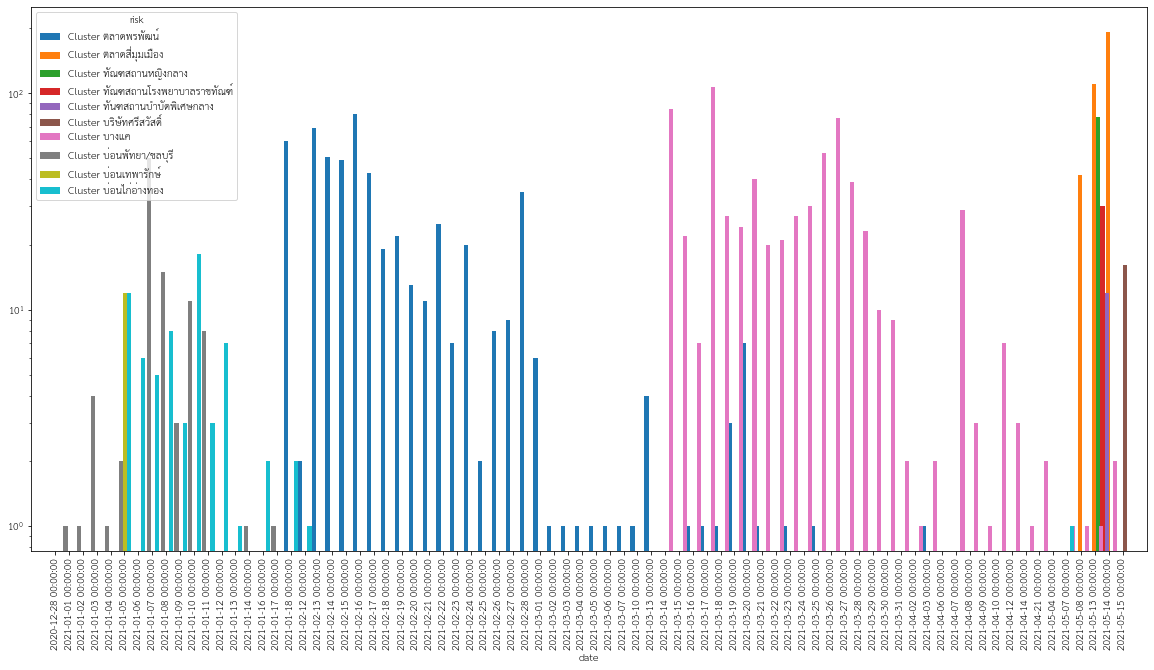

In [ ]:
fclusdate = clusdate.iloc[:,20:30]
fclusdate = fclusdate[fclusdate.sum(1)>0]
fclusdate.plot.bar(figsize=(20,10),width=3,logy=True)

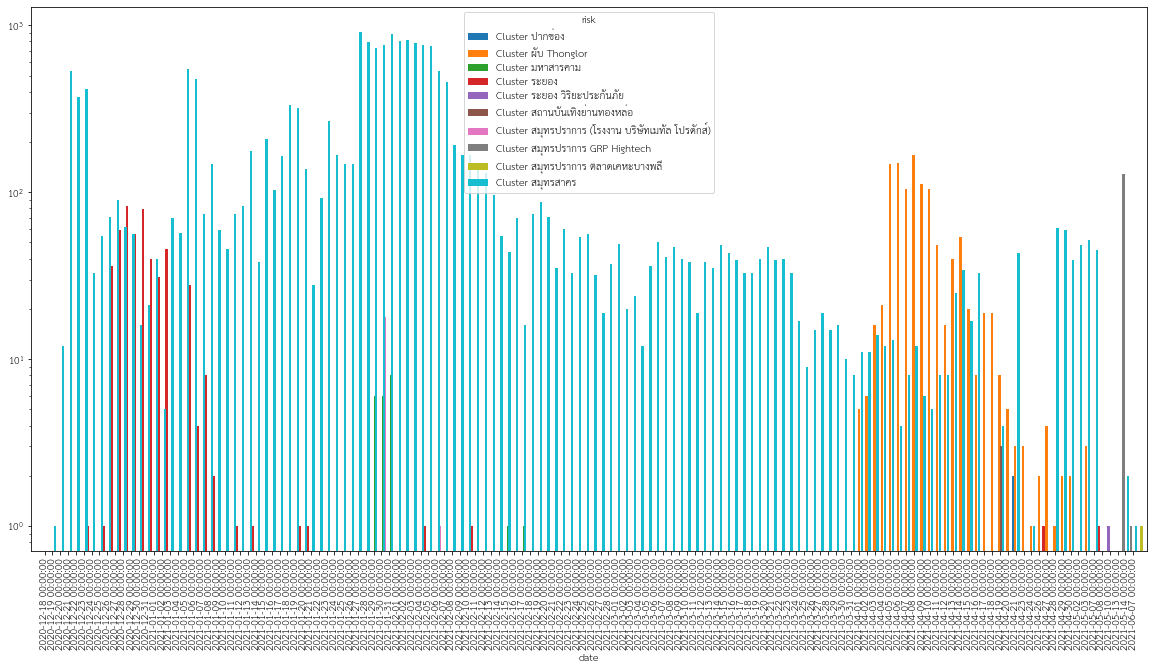

In [ ]:
fclusdate = clusdate.iloc[:,30:40]
fclusdate = fclusdate[fclusdate.sum(1)>0]
fclusdate.plot.bar(figsize=(20,10),width=3,logy=True)

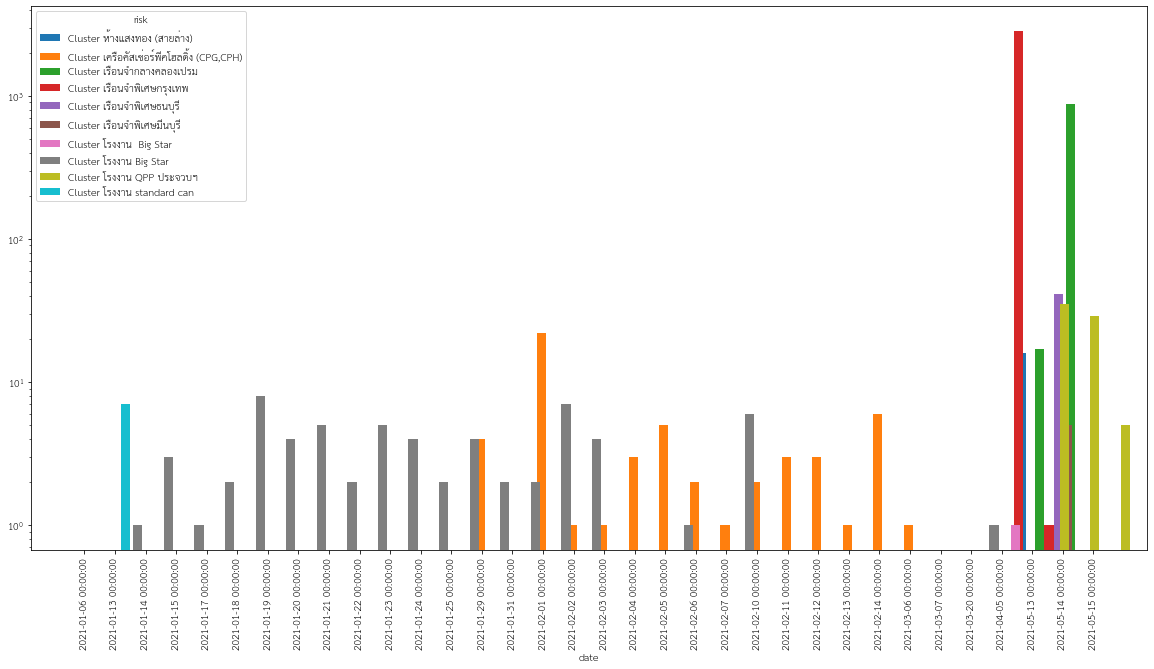

In [ ]:
fclusdate = clusdate.iloc[:,40:50]
fclusdate = fclusdate[fclusdate.sum(1)>0]
fclusdate.plot.bar(figsize=(20,10),width=3,logy=True)

In [ ]:
dat[dat['risk']==lc[0]].groupby('date').count()[['No.']]

,No.
date,
2021-01-31,4
2021-02-02,22
2021-02-03,1
2021-02-04,1
2021-02-05,3
2021-02-06,5
2021-02-07,2
2021-02-10,1
2021-02-11,2


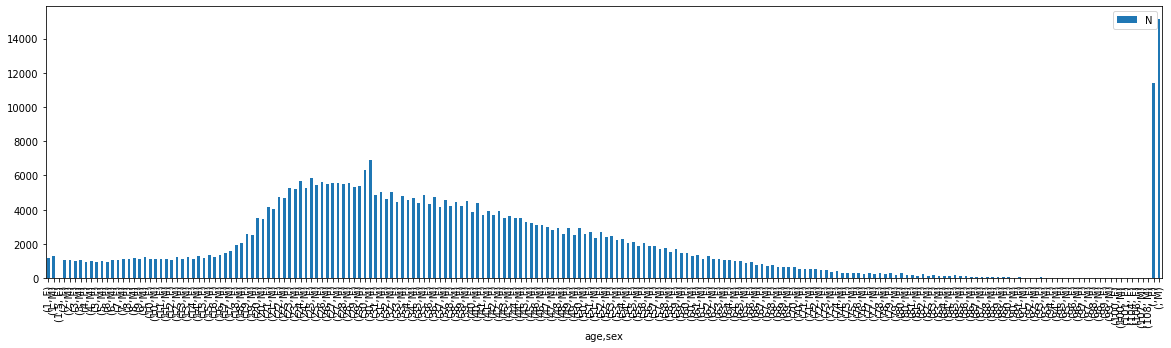

In [ ]:
datas['N'] = datas['sex']
datas.groupby(by=['age','sex']).count().plot.bar(figsize=(20,5))